In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
cols = ["mean radius", "mean texture",
        "mean smoothness", "mean compactness", "mean concave points",
        "worst radius", "worst texture",
        "worst smoothness", "worst compactness", "worst concave points",
        "class"]

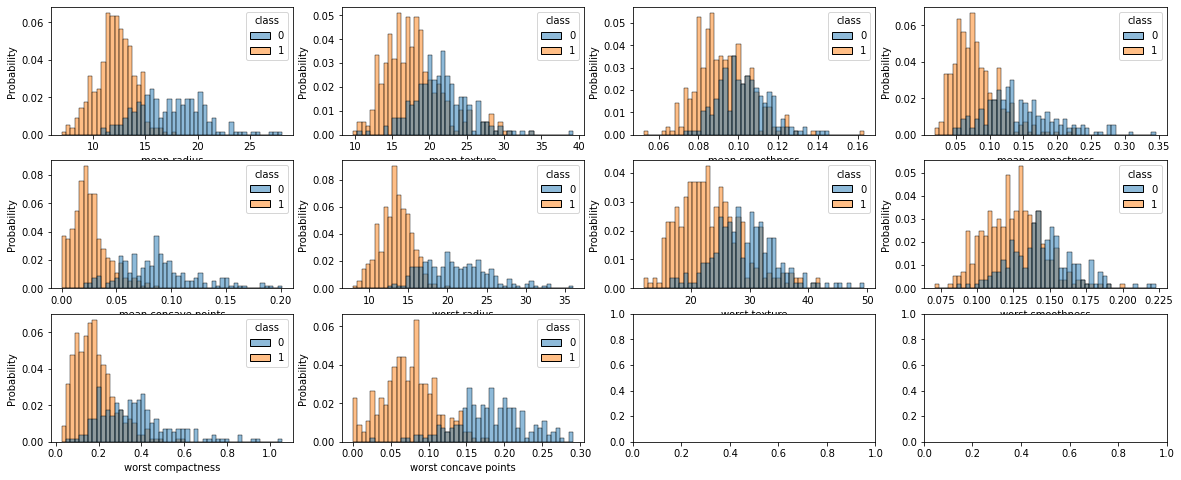

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(20, 8))
for col, ax in zip(cols[:-1], axs.ravel()):
    sns.histplot(df, x=col, hue=cols[-1], bins=50, stat='probability', ax=ax)

In [12]:
data = torch.from_numpy(df.loc[:, cols].values).float()
X = data[:, :-1]
y = data[:, -1:]
X.shape, y.shape

(torch.Size([569, 10]), torch.Size([569, 1]))

In [13]:
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [17]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()

    def forward(self, X):
        y = self.act(self.linear(X))
        return y

In [18]:
model = MyModel(input_dim=X.size(-1), output_dim=y.size(-1))
model

MyModel(
  (linear): Linear(in_features=10, out_features=1, bias=True)
  (act): Sigmoid()
)

In [23]:
crit = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = crit(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0:
        print(f'Epoch {i + 1}: loss={loss:.4e}')

Epoch 10000: loss=2.7390e-01
Epoch 20000: loss=2.2672e-01
Epoch 30000: loss=1.9842e-01
Epoch 40000: loss=1.7988e-01
Epoch 50000: loss=1.6688e-01
Epoch 60000: loss=1.5728e-01
Epoch 70000: loss=1.4991e-01
Epoch 80000: loss=1.4406e-01
Epoch 90000: loss=1.3931e-01
Epoch 100000: loss=1.3536e-01
Epoch 110000: loss=1.3203e-01
Epoch 120000: loss=1.2918e-01
Epoch 130000: loss=1.2671e-01
Epoch 140000: loss=1.2455e-01
Epoch 150000: loss=1.2264e-01
Epoch 160000: loss=1.2094e-01
Epoch 170000: loss=1.1942e-01
Epoch 180000: loss=1.1804e-01
Epoch 190000: loss=1.1679e-01
Epoch 200000: loss=1.1564e-01


In [29]:
correct_cnt = (y == (y_hat > 0.5)).sum()
total_cnt = y.size(0)
print(f'{correct_cnt / total_cnt:.2%}')

96.66%


<AxesSubplot:xlabel='y_hat', ylabel='Probability'>

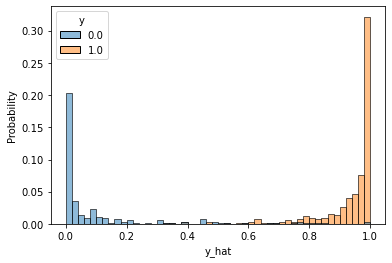

In [30]:
df = pd.DataFrame(torch.concat([y, y_hat], dim=1).detach().numpy(), columns=['y', 'y_hat'])
sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')